In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from numpy import ndarray
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import libs.ds_charts as ds

# Missing values imputation

In [4]:
dataset_2 = pd.read_csv('data/air_quality_tabular.csv', na_values='NaN')
new_dataset_2 = dataset_2.copy()
#FIND VARIABLES WITH MISSING VALUES
mv = {}
for var in new_dataset_2:
    nr = new_dataset_2[var].isna().sum()
    if nr > 0:
        mv[var] = nr

#DISCARD COLUMNS WITH MORE THEN 90% MISSING VALUES
threshold = new_dataset_2.shape[0] * 0.90

missings = [c for c in mv.keys() if mv[c]>threshold]
new_dataset_2.drop(columns=missings, inplace=True)
print('Dropped variables', missings)

#DISCARD RECORDS WITH MAJORITY OF MISSING VALUES
threshold = new_dataset_2.shape[1] * 0.50

new_dataset_2.dropna(thresh=threshold, inplace=True)
print(new_dataset_2.shape)

# numeric values
for column in mv:
    if column != "Field_1":
        vars = new_dataset_2[column]
        mean_vars = int(vars.mean())
        new_dataset_2[column].fillna(mean_vars,inplace=True)
        
new_dataset_2.dropna(inplace=True)


Dropped variables []
(161631, 32)


# Dummification

In [5]:
file = 'air_quality'
filename = 'data/air_quality.csv'
symbolic_vars = ['Prov_EN','date']


def dummify(df, vars_to_dummify):
    other_vars = [c for c in df.columns if not c in vars_to_dummify]
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype=bool)
    X = df[vars_to_dummify]
    encoder.fit(X)
    new_vars = encoder.get_feature_names(vars_to_dummify)
    trans_X = encoder.transform(X)
    dummy = pd.DataFrame(trans_X, columns=new_vars, index=X.index)
    dummy = dummy.convert_dtypes(convert_boolean=True)

    final_df = pd.concat([df[other_vars], dummy], axis=1)
    return final_df

## Transform dates to 1,2,3,4,5,6,7,8,9,10,11 (months)
new_dataset_2['date'] = new_dataset_2['date'].apply(lambda x: int(x.split('/')[1]))

variables = ds.get_variable_types(new_dataset_2)
new_dataset_2 = dummify(new_dataset_2, symbolic_vars)

## Only cities were dummified because of our granularity study.
new_dataset_2.drop('City_EN', axis =1,inplace=True)

new_dataset_2.to_csv(f'data/{file}_dummified.csv', index=False)

print(new_dataset_2.head())

   FID GbCity  GbProv  Field_1 ALARM   CO_Mean  CO_Min  CO_Max    CO_Std  \
0    0   1100      11     24.0  Safe  0.792917    0.60    1.09  0.103581   
1    1   1200      12    245.0  Safe  1.157083    0.71    1.46  0.211965   
2    2   1301      13    228.0  Safe  1.489167    1.17    1.94  0.191788   
3    3   1302      13    244.0  Safe  1.882083    1.10    4.22  0.793573   
4    4   1303      13    201.0  Safe  1.389583    0.78    2.14  0.407824   

    NO2_Mean  ...  date_3  date_4  date_5  date_6  date_7  date_8  date_9  \
0  48.875000  ...   False   False   False   False   False   False   False   
1  72.916667  ...   False   False   False   False   False   False   False   
2  63.875000  ...   False   False   False   False   False   False   False   
3  69.625000  ...   False   False   False   False   False   False   False   
4  44.750000  ...   False   False   False   False   False   False   False   

   date_10  date_11  date_12  
0    False    False    False  
1    False    Fals

## VER SE HÁ ALGUMA CORRELAÇÃO ENTRE CITY E ALARM (TARGET) para justificar dropar o city. Justicar uma correlacao entre province e alarm para justificar termos deixado so a provincia

In [6]:
new_dataset_2

,FID,GbCity,GbProv,Field_1,ALARM,CO_Mean,CO_Min,CO_Max,CO_Std,NO2_Mean,...,date_3,date_4,date_5,date_6,date_7,date_8,date_9,date_10,date_11,date_12
0,0,1100,11,24.0,Safe,0.792917,0.60,1.09,0.103581,48.875000,...,False,False,False,False,False,False,False,False,False,False
1,1,1200,12,245.0,Safe,1.157083,0.71,1.46,0.211965,72.916667,...,False,False,False,False,False,False,False,False,False,False
2,2,1301,13,228.0,Safe,1.489167,1.17,1.94,0.191788,63.875000,...,False,False,False,False,False,False,False,False,False,False
3,3,1302,13,244.0,Safe,1.882083,1.10,4.22,0.793573,69.625000,...,False,False,False,False,False,False,False,False,False,False
4,4,1303,13,201.0,Safe,1.389583,0.78,2.14,0.407824,44.750000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169229,333,6531,65,135.0,Danger,1.091667,0.30,2.53,0.703477,35.916667,...,True,False,False,False,False,False,False,False,False,False
169230,334,6532,65,90.0,Danger,0.939583,0.65,1.55,0.256572,34.041667,...,True,False,False,False,False,False,False,False,False,False
169231,335,6540,65,299.0,Safe,0.632500,0.53,1.30,0.148190,14.166667,...,True,False,False,False,False,False,False,False,False,False
169232,336,6542,65,239.0,Safe,0.283333,0.10,0.60,0.203443,7.833333,...,True,False,False,False,False,False,False,False,False,False


In [7]:
# # FOR CITIES
# cities = new_dataset_2['City_EN'].unique()
# alarm_cities = new_dataset_2.groupby(['ALARM','City_EN'],as_index=False).size()

# safe = alarm_cities[alarm_cities['ALARM']=='Safe']
# danger = alarm_cities[alarm_cities['ALARM']=='Danger']
# #print(danger)

# df = pd.DataFrame({'Danger (Cities)':danger['size'].array},index = danger['City_EN'])
# ax = df.plot.bar(rot=0)

# df = pd.DataFrame({'Safe (Cities)':safe['size'].array},index = safe['City_EN'])
# ax = df.plot.bar(rot=0)


# # FOR PROVINCES

# provinces = new_dataset_2['Prov_EN'].unique()
# alarm_prov = new_dataset_2.groupby(['ALARM','Prov_EN'],as_index=False).size()

# safe = alarm_prov[alarm_prov['ALARM']=='Safe']
# danger = alarm_prov[alarm_prov['ALARM']=='Danger']
# #print(danger)

# df = pd.DataFrame({'Danger (Provinces)':danger['size'].array},index = danger['Prov_EN'])
# ax = df.plot.bar(rot=0)

# df = pd.DataFrame({'Safe (Provinces)':safe['size'].array},index = safe['Prov_EN'])
# ax = df.plot.bar(rot=0)


### Outliers Imputation

In [8]:
new_dataset_2 = new_dataset_2[new_dataset_2.CO_Mean<10]
new_dataset_2 = new_dataset_2[new_dataset_2.CO_Max<40]
new_dataset_2 = new_dataset_2[new_dataset_2.CO_Std<15]
new_dataset_2 = new_dataset_2[new_dataset_2.NO2_Max<300]
new_dataset_2 = new_dataset_2[new_dataset_2.NO2_Std<60]
new_dataset_2 = new_dataset_2[new_dataset_2.O3_Max<400]
new_dataset_2 = new_dataset_2[new_dataset_2.O3_Std<125]

## WHERE IS PM2.5?

## Scalling

In [9]:
variable_types = ds.get_variable_types(new_dataset_2)
numeric_vars = ['Field_1','CO_Mean', 'CO_Min', 'CO_Max', 'CO_Std', 'NO2_Mean', 'NO2_Min', 'NO2_Max', 'NO2_Std', 'O3_Mean', 'O3_Min', 'O3_Max', 'O3_Std', 'PM2.5_Mean', 'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Mean', 'PM10_Min', 'PM10_Max', 'PM10_Std', 'SO2_Mean', 'SO2_Min', 'SO2_Max', 'SO2_Std']
symbolic_vars = []
boolean_vars = variable_types['Binary']

df_nr = new_dataset_2[numeric_vars]
df_sb = new_dataset_2[symbolic_vars]
df_bool = new_dataset_2[boolean_vars]

print(numeric_vars)
print(symbolic_vars)
print(boolean_vars)

['Field_1', 'CO_Mean', 'CO_Min', 'CO_Max', 'CO_Std', 'NO2_Mean', 'NO2_Min', 'NO2_Max', 'NO2_Std', 'O3_Mean', 'O3_Min', 'O3_Max', 'O3_Std', 'PM2.5_Mean', 'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Std', 'PM10_Mean', 'PM10_Min', 'PM10_Max', 'PM10_Std', 'SO2_Mean', 'SO2_Min', 'SO2_Max', 'SO2_Std']
[]
['ALARM', 'Prov_EN_Anhui', 'Prov_EN_Beijing', 'Prov_EN_Chongqing', 'Prov_EN_Fujian', 'Prov_EN_Gansu', 'Prov_EN_Guangdong', 'Prov_EN_Guangxi', 'Prov_EN_Guizhou', 'Prov_EN_Hainan', 'Prov_EN_Hebei', 'Prov_EN_Heilongjiang', 'Prov_EN_Henan', 'Prov_EN_Hubei', 'Prov_EN_Hunan', 'Prov_EN_Jiangsu', 'Prov_EN_Jiangxi', 'Prov_EN_Jilin', 'Prov_EN_Liaoning', 'Prov_EN_Neimenggu', 'Prov_EN_Ningxia', 'Prov_EN_Qinghai', 'Prov_EN_Shaanxi', 'Prov_EN_Shandong', 'Prov_EN_Shanghai', 'Prov_EN_Shanxi', 'Prov_EN_Sichuan', 'Prov_EN_Tianjin', 'Prov_EN_Xinjiang', 'Prov_EN_Xizang', 'Prov_EN_Yunnan', 'Prov_EN_Zhejiang', 'date_1', 'date_2', 'date_3', 'date_4', 'date_5', 'date_6', 'date_7', 'date_8', 'date_9', 'date_10', 'date_11', 'da

In [10]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame, concat

transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_nr)
tmp = DataFrame(transf.transform(df_nr), index=new_dataset_2.index, columns= numeric_vars)
norm_data_zscore = concat([tmp, df_sb,  df_bool], axis=1)
norm_data_zscore.to_csv(f'data/dataset_2dataset_2{file}_scaled_zscore.csv', index=False)

              Field_1        CO_Mean         CO_Min         CO_Max  \
count   146101.000000  146101.000000  146101.000000  146101.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.500672       0.100806       0.143402       0.033784   
std          0.289910       0.048661       0.066941       0.023330   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.248521       0.070791       0.100817       0.019914   
50%          0.500000       0.091113       0.136240       0.027879   
75%          0.754438       0.117835       0.171662       0.039496   
max          1.000000       1.000000       1.000000       1.000000   

               CO_Std       NO2_Mean        NO2_Min        NO2_Max  \
count   146101.000000  146101.000000  146101.000000  146101.000000   
unique            N

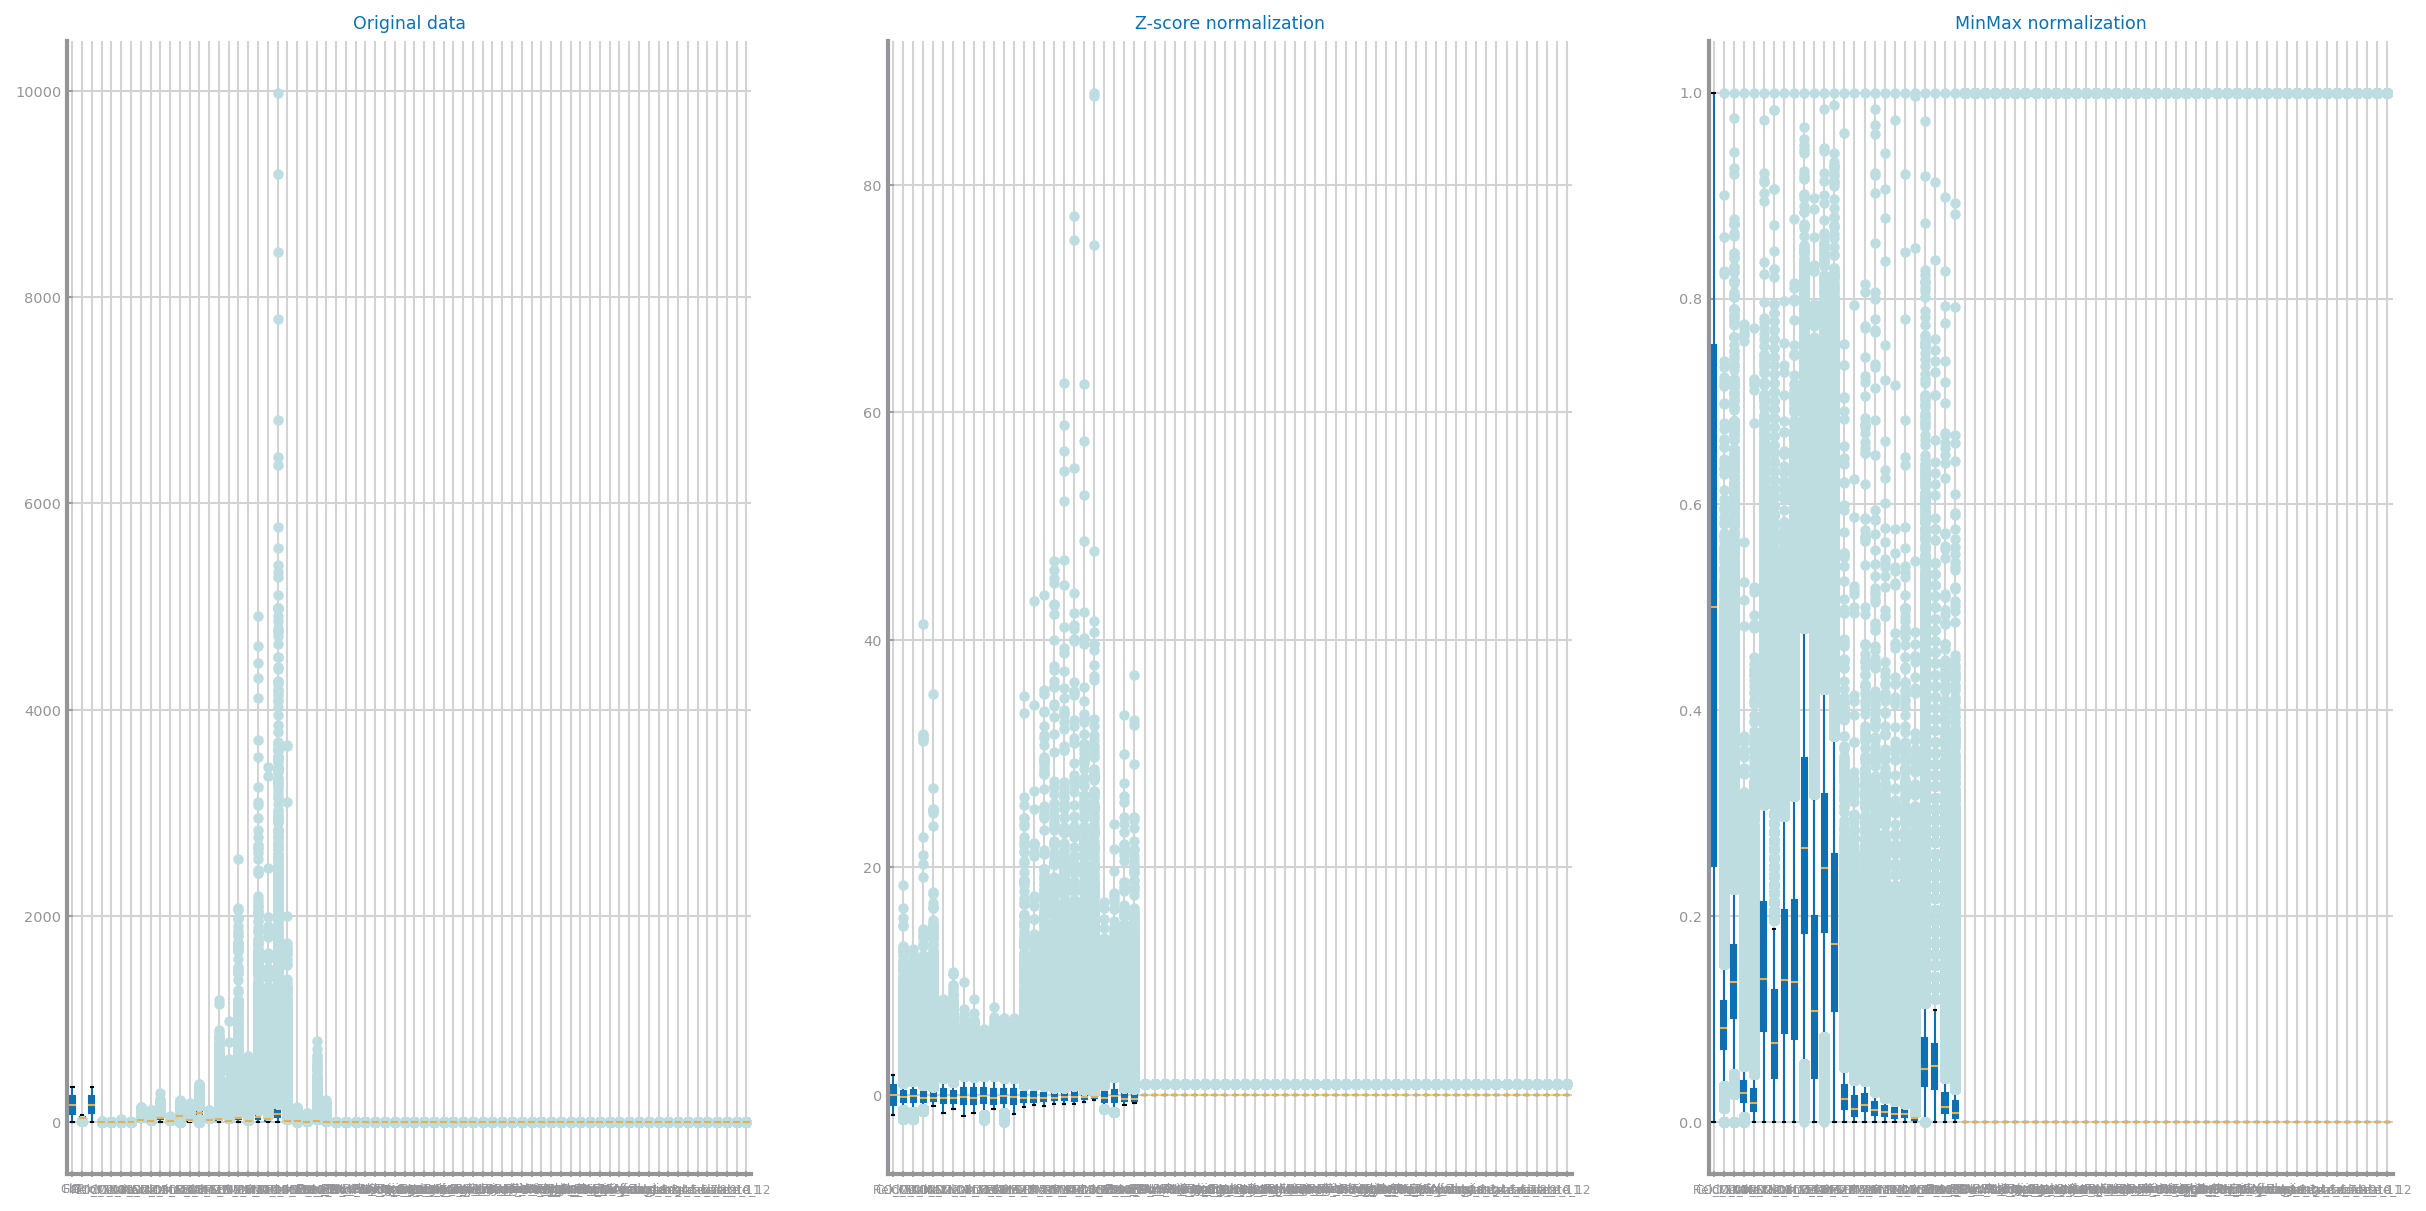

In [11]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame, concat

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
tmp = DataFrame(transf.transform(df_nr), index=new_dataset_2.index, columns= numeric_vars)
norm_data_minmax = concat([tmp, df_sb,  df_bool], axis=1)
norm_data_minmax.to_csv(f'data/{file}_scaled_minmax.csv', index=False)
print(norm_data_minmax.describe())

from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20,10),squeeze=False)
axs[0, 0].set_title('Original data')
new_dataset_2.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('Z-score normalization')
norm_data_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title('MinMax normalization')
norm_data_minmax.boxplot(ax=axs[0, 2])
show()

#norm_data_zscore.to_csv('data/dataset_2dataset_2air_quality_scaled_zscore.csv', index=False)

## Train And Test ZSCORE

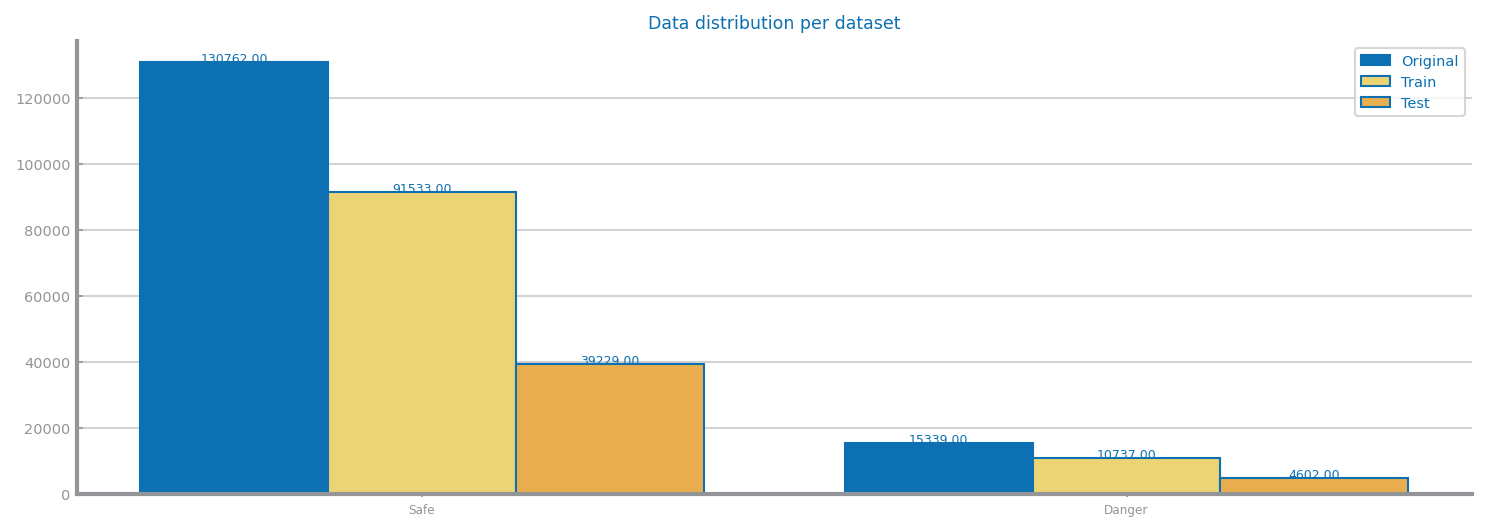

In [12]:
import numpy as np
from pandas import read_csv, concat, unique, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

file_tag = 'air_quality_scaled_zscore'
data: DataFrame = read_csv('data/air_quality_scaled_zscore.csv')
target = 'ALARM'
positive = 'Safe'
negative = 'Danger'
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = unique(y)
labels.sort()

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train = concat([DataFrame(trnX, columns=data.columns), DataFrame(trnY,columns=[target])], axis=1)
train.to_csv(f'data/dataset_2dataset_2{file_tag}_train.csv', index=False)

test = concat([DataFrame(tstX, columns=data.columns), DataFrame(tstY,columns=[target])], axis=1)
test.to_csv(f'data/dataset_2dataset_2{file_tag}_test.csv', index=False)
values['Train'] = [len(np.delete(trnY, np.argwhere(trnY==negative))), len(np.delete(trnY, np.argwhere(trnY==positive)))]
values['Test'] = [len(np.delete(tstY, np.argwhere(tstY==negative))), len(np.delete(tstY, np.argwhere(tstY==positive)))]

plt.figure(figsize=(12,4))
ds.multiple_bar_chart([positive, negative], values, title='Data distribution per dataset')
plt.show()

## Train And Test MINMAX

In [13]:
import numpy as np
from pandas import read_csv, concat, unique, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

file_tag = 'air_quality_scaled_minmax'
data: DataFrame = read_csv('data/dataset_2dataset_2air_quality_scaled_minmax.csv')
target = 'ALARM'
positive = 'Safe'
negative = 'Danger'
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = unique(y)
labels.sort()

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train = concat([DataFrame(trnX, columns=data.columns), DataFrame(trnY,columns=[target])], axis=1)
train.to_csv(f'data/dataset_2dataset_2{file_tag}_train.csv', index=False)

test = concat([DataFrame(tstX, columns=data.columns), DataFrame(tstY,columns=[target])], axis=1)
test.to_csv(f'data/dataset_2dataset_2{file_tag}_test.csv', index=False)
values['Train'] = [len(np.delete(trnY, np.argwhere(trnY==negative))), len(np.delete(trnY, np.argwhere(trnY==positive)))]
values['Test'] = [len(np.delete(tstY, np.argwhere(tstY==negative))), len(np.delete(tstY, np.argwhere(tstY==positive)))]

plt.figure(figsize=(12,4))
ds.multiple_bar_chart([positive, negative], values, title='Data distribution per dataset')
plt.show()

KeyboardInterrupt: 